## Criando algorítmo para calcular tom de uma imagem

In [1]:
# Importando OpenCV para acessar matriz da imagem
import cv2
# Importando interface do sistema
import os
# Importando pyplot
from matplotlib import pyplot as plt
# Importando Numpy
import numpy as np
# Importando copyfile do shutil para copiar arquivos
from shutil import copyfile
# Importando barra de progresso
from tqdm import tqdm

In [2]:
# Verificando o diretório atual e alterando para trabalhar com os wallpapers do computador
print(os.getcwd())
os.chdir('D:\\Wallpapers')
print(os.getcwd())

C:\Users\Avell\GitHub\PAUD
D:\Wallpapers


1920 x 1200


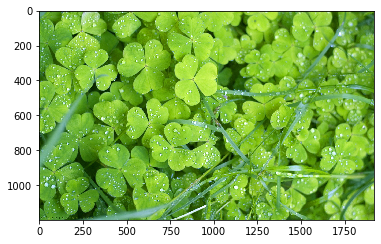

In [3]:
# Importando imagem de base
imagem = cv2.imread("base.jpg")
# Verificando dimensões
print(len(imagem[1]),'x',len(imagem))
# Exibindo a imagem em uma janela nova via OpenCV
    # cv2.imshow("Original", imagem)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
# Plotando imagem via pyplot, mas antes é necessário inverter o BGR para RGB através do numpy
plt.imshow(np.flip(imagem, 2))

In [4]:
# Informações da imagem
print("Largura (width): %d pixels" % (imagem.shape[1]))
print("Altura (height): %d pixels" % (imagem.shape[0]))
print("Canais (channels): %d"      % (imagem.shape[2]))

Largura (width): 1920 pixels
Altura (height): 1200 pixels
Canais (channels): 3


In [5]:
# Verificando valores do BGR para o primeiro pixel
print(imagem[0, 0])
print(imagem[0][0])

[ 48 155  92]
[ 48 155  92]


In [6]:
# Jogando os valores nas variáveis r g b
(b, g, r) = imagem[0, 0]
print("Cor do pixel em (0, 0) - Vermelho: %d, Verde: %d, Azul: %d" % (r, g, b))

Cor do pixel em (0, 0) - Vermelho: 92, Verde: 155, Azul: 48


In [7]:
# Visualizando as informações da imagem limitando a uma dimensão 3x3
imagem[0:3, 0:3]

array([[[ 48, 155,  92],
        [ 50, 156,  90],
        [ 50, 156,  90]],

       [[ 51, 159,  93],
        [ 53, 159,  93],
        [ 53, 157,  92]],

       [[ 57, 163,  97],
        [ 55, 161,  95],
        [ 53, 157,  92]]], dtype=uint8)

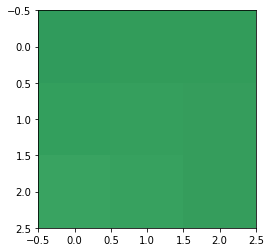

In [8]:
# Plotando a dimensão 3x3
plt.imshow(imagem[0:3, 0:3])

In [9]:
# Realizando a média da vertical e depois da horizontal
media = np.average(np.average(imagem, axis=1), axis=0)
print('Média:',media)
# Colocando valores em um array 3d e arredondando para inteiros
array = np.int_([[media.tolist()]])
print('Arredondado:', array)

Média: [ 56.45864106 172.4796224  114.21835069]
Arredondado: [[[ 56 172 114]]]


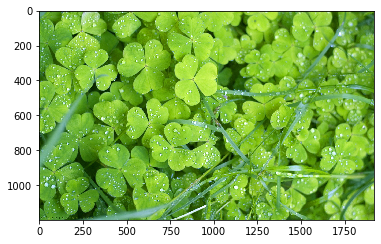

In [10]:
# Imagem original
plt.imshow(np.flip(imagem, 2))

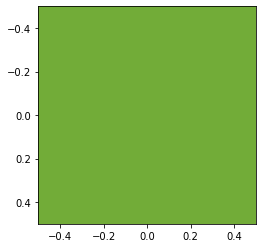

In [11]:
# Tom da imagem
plt.imshow(np.flip(array))

## Criando as funções do algorítmo

In [12]:
# Criando uma função para achar o tom
# def tom(arquivo):
#     # Importando imagem
#     img = np.flip(cv2.imread(arquivo), 2)
#     # Calculando média do tom
#     media = np.average(np.average(img, axis=1), axis=0)
#     # Arredondado valores dos canais BGR
#     array = np.flip( np.int_([[media.tolist()]]) )
#     # Retornando imagem e tom
#     return(img, array)

# Criando uma função para achar o tom sem inverter RGB
def tom(arquivo):
    # Importando imagem
    img = cv2.imread(arquivo)
    # Calculando média do tom
    media = np.average(np.average(img, axis=1), axis=0)
    # Arredondado valores dos canais BGR
    array = np.int_([[media.tolist()]])
    # Retornando imagem e tom
    return(img, array)

In [67]:
# Puxando a imagem e o tom
imagem, array = tom('0448 - 8QRkbum.jpg')

In [14]:
# Criando função de plotagem com inversão do RGB
def plota(imagem, array):
    # Plotando a imagem e o tom
    # Definindo tamnho 
    fig = plt.figure(figsize=(15,4))
    # Adicionando a imagem
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('Imagem')
    plt.imshow(np.flip(imagem, 2))
    # Adicionando o tom
    ax2 = fig.add_subplot(122)
    ax2.title.set_text('Tom')
    plt.imshow(np.flip(array))
    # Exibindo tudo
    plt.show()

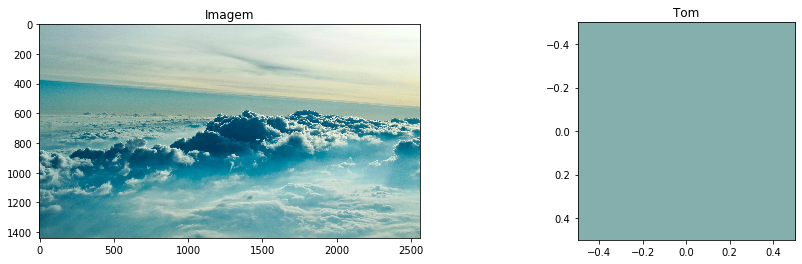

In [68]:
# Verificando resultados
plota(imagem, array)

## Criando um filtro para definir range de tons

In [69]:
b,g,r = array[0,0]
r,g,b

(132, 175, 173)

In [70]:
# Definindo diretório
diretorio = './Verdes/'
# Criando o diretório para o laço
try: 
    os.mkdir(diretorio)
except OSError as error: 
    pass 
# Gerando uma lista somente dos arquivos
files = [f for f in os.listdir('./') if os.path.isfile(f) and f.endswith(".jpg") and f.endswith(".jpg")]
# Percorrendo e testando todos os arquivos
erros = ()
with tqdm(total=len(files)) as pbar:
    for filename in files:
        pbar.update(1)
        pbar.set_description("Processing %s" % filename)
        try:
            imagem, array = tom(filename)
            r,g,b = array[0,0]
            if (b > g) or (r > g):
                continue
            elif ((((g >= 100) and (b*1.3 <= g or r*1.3 <= g)) or # Cores claras precisam de um verde menos distante
                  ((g >= 25) and (b*1.5 <= g or r*1.5<= g)) or    # Cores escuras precisam de um verde mais distante
                   (g > 10 and b < 3 and r < 3)) and              # Imagens com tons escuros
                   (b*1.1 < g and r*1.1 <g)):                     # Para reduzir o amarelo e azul esverdeado
                copyfile(filename, diretorio + str(filename))
            else:
                continue
        except:
            erros.append(filename)
            pass
print('Processado com %d erros' % len(erros))

Processing [OC] [1920x1080] Covering against sky - Imgur.jpg: 100%|███████████| 12215/12215 [17:11<00:00, 11.84it/s]                                                                                                             


Processado com 0 erros
